# Assignment A0
### This project is focused on filling missing values by the help of statistics analysis.

### We have a set of data formatted in csv named "FuelConsumptionCo2" in which gives us some information about vehicales properties to estimate total amount of Co2 produced by each car in average.

## Part 1 - Csv file overview

**head** function shows us first 5 rows of dataframe





In [295]:
import pandas as pd
df = pd.read_csv('FuelConsumptionCo2.csv')
df.head()

,Unnamed: 0,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,0,2014,ACURA,ILX,COMPACT,2.0,4.0,AS5,Z,9.9,6.7,8.5,33,196.0
1,1,2014,ACURA,ILX,COMPACT,2.4,4.0,M6,Z,11.2,7.7,9.6,29,221.0
2,2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4.0,AV7,Z,6.0,5.8,5.9,48,136.0
3,3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,Z,12.7,9.1,11.1,25,NaN
4,4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6.0,AS6,Z,12.1,8.7,10.6,27,244.0


In this line we get rid of the first column that represents the indexes. Dataframe itself handles this so we don't need that

In [296]:
df.drop(df.columns[0], axis=1, inplace=True)

**tail** function shows us last 5 rows of dataframe

In [297]:
df.tail()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6.0,AS6,X,13.2,9.5,11.5,25,264.0
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6.0,AS6,X,13.4,9.8,11.8,24,271.0
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6.0,AS6,X,12.9,9.3,11.3,25,260.0
1066,2014,VOLVO,XC90 AWD,SUV - STANDARD,3.2,6.0,AS6,X,14.9,10.2,12.8,22,294.0


**describe** function gives us some statistics properties of each column of dataset

In [298]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1040.000000,1033.000000,1067.000000,1067.000000,1067.000000,1067.000000,964.000000
mean,2014.0,3.324038,5.797677,13.296532,9.474602,11.580881,26.441425,256.741701
std,0.0,1.411400,1.807262,4.101253,2.794510,3.485595,7.468702,63.265308
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,209.000000
50%,2014.0,3.300000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.200000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,437.000000


## Part 2 - Types of each column

**info** function gives us information about type of each column and also the number of null or NaN values in each of them.

In [299]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1058 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1040 non-null   float64
 5   CYLINDERS                 1033 non-null   float64
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  996 non-null    object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              964 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 108.5+ KB


mapping FUELTYPE values into numbers in range [0,3]

In [300]:
letter_to_num_map = {'X': 0, 'E': 1, 'D': 2, 'Z': 3}
df.replace({'FUELTYPE': letter_to_num_map}, inplace=True)

## Part 3 - Finding & filling NaN values

Count NaN values in each column

In [301]:
column_sum = df.isna().sum()
print(column_sum)

MODELYEAR                     0
MAKE                          0
MODEL                         9
VEHICLECLASS                  0
ENGINESIZE                   27
CYLINDERS                    34
TRANSMISSION                  0
FUELTYPE                     71
FUELCONSUMPTION_CITY          0
FUELCONSUMPTION_HWY           0
FUELCONSUMPTION_COMB          0
FUELCONSUMPTION_COMB_MPG      0
CO2EMISSIONS                103
dtype: int64


Get column which has NaN values

In [302]:
import numpy as np
columns_with_nan = column_sum.index[np.where(column_sum > 0)[0]]
print(list(columns_with_nan))

['MODEL', 'ENGINESIZE', 'CYLINDERS', 'FUELTYPE', 'CO2EMISSIONS']


Filling NaN values with mean except for the rows that has missing target values.<br>
**pros**: No loss of data, we can continue analysis on other columns of the row and the actuall cell which was NaN <br>
**cons**: inaccuracy, dataset may have some outliers that can significantly effect mean value.

In [303]:
df.loc[~df['CO2EMISSIONS'].isna() & df['ENGINESIZE'].isna(), 'ENGINESIZE'] = df['ENGINESIZE'].mean()
df.loc[~df['CO2EMISSIONS'].isna() & df['CYLINDERS'].isna(), 'CYLINDERS'] = int(df['CYLINDERS'].mean())
df.loc[~df['CO2EMISSIONS'].isna() & df['MODEL'].isna(), 'MODEL'] = df['MODEL'].mode()

Exclude rows with NaN target values

In [304]:
df_with_target_nan = df.loc[df['CO2EMISSIONS'].isna()]
df.drop(df_with_target_nan.index, inplace=True)

## Part 4 - Filtering

a nice neat wrapper to calculate execution time of a function

In [305]:
import time 
def execution_time_wrapper(func):
    def inner(*args, **kwargs):
        p_tic = time.perf_counter()
        tic = time.time()

        result = func(*args, **kwargs)

        toc = time.time()
        p_toc = time.perf_counter()
        print(f'Result: {result}')
        print(f'Compute time: {round(1000 * (toc - tic), 6)}ms')
        print(f'Compute time (cpu) : {round(1000 * (p_toc - p_tic), 6)}ms')

    return inner

In [306]:
@execution_time_wrapper
def compute_mean_vectorized(s: pd.Series):
    return s.mean()

mean fuel consumption city for vehicles that have more than 240 CO2 emissions.

In [307]:
compute_mean_vectorized(df.loc[df['CO2EMISSIONS'] > 240, 'FUELCONSUMPTION_CITY'])

Result: 16.035272045028144
Compute time: 0.282049ms
Compute time (cpu) : 0.283152ms


mean fuel consumption for vehicles that have less than 300 CO2 emissions.

In [308]:
compute_mean_vectorized(df.loc[df['CO2EMISSIONS'] < 300, 'FUELCONSUMPTION_CITY'])

Result: 11.82977303070761
Compute time: 0.214338ms
Compute time (cpu) : 0.215153ms


## Part 5 - previus section without vectorization

In [309]:
@execution_time_wrapper
def compute_mean_loop(s: pd.Series):
    sum = 0
    for x in s:
        sum += x 
    return sum/s.size

In [310]:
compute_mean_vectorized(df.loc[df['CO2EMISSIONS'] > 240, 'FUELCONSUMPTION_CITY'])

Result: 16.035272045028144
Compute time: 0.115871ms
Compute time (cpu) : 0.116429ms


In [311]:
compute_mean_vectorized(df.loc[df['CO2EMISSIONS'] < 300, 'FUELCONSUMPTION_CITY'])

Result: 11.82977303070761
Compute time: 0.116825ms
Compute time (cpu) : 0.117684ms


We see that vectorization is 3 times faster

## Part 6 - Plotting

array([[<AxesSubplot:title={'center':'MODELYEAR'}>,
        <AxesSubplot:title={'center':'ENGINESIZE'}>,
        <AxesSubplot:title={'center':'CYLINDERS'}>],
       [<AxesSubplot:title={'center':'FUELTYPE'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_CITY'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_HWY'}>],
       [<AxesSubplot:title={'center':'FUELCONSUMPTION_COMB'}>,
        <AxesSubplot:title={'center':'FUELCONSUMPTION_COMB_MPG'}>,
        <AxesSubplot:title={'center':'CO2EMISSIONS'}>]], dtype=object)

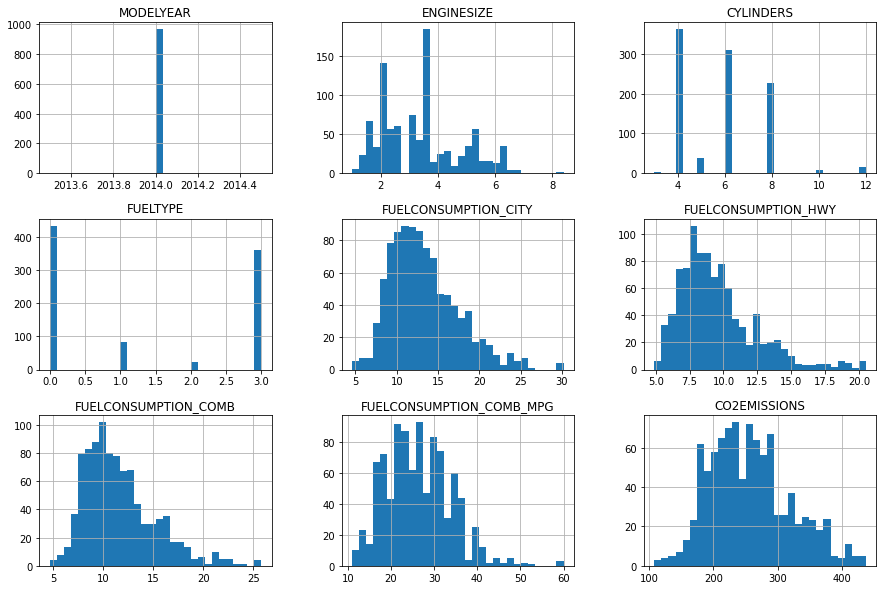

In [312]:
df.hist(bins=30, figsize=(15,10))

<AxesSubplot:xlabel='MAKE'>

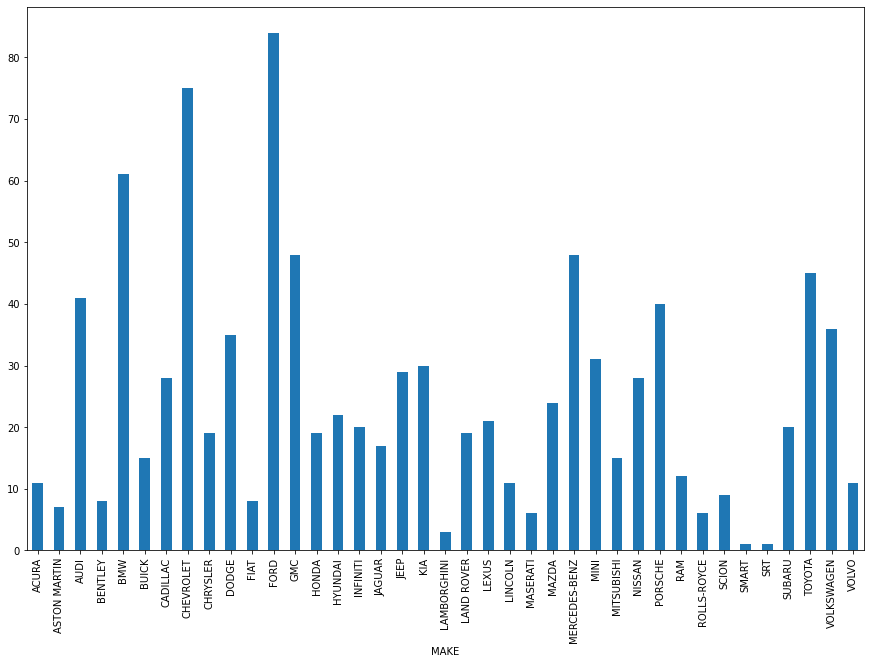

In [313]:
df.groupby('MAKE').size().plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='VEHICLECLASS'>

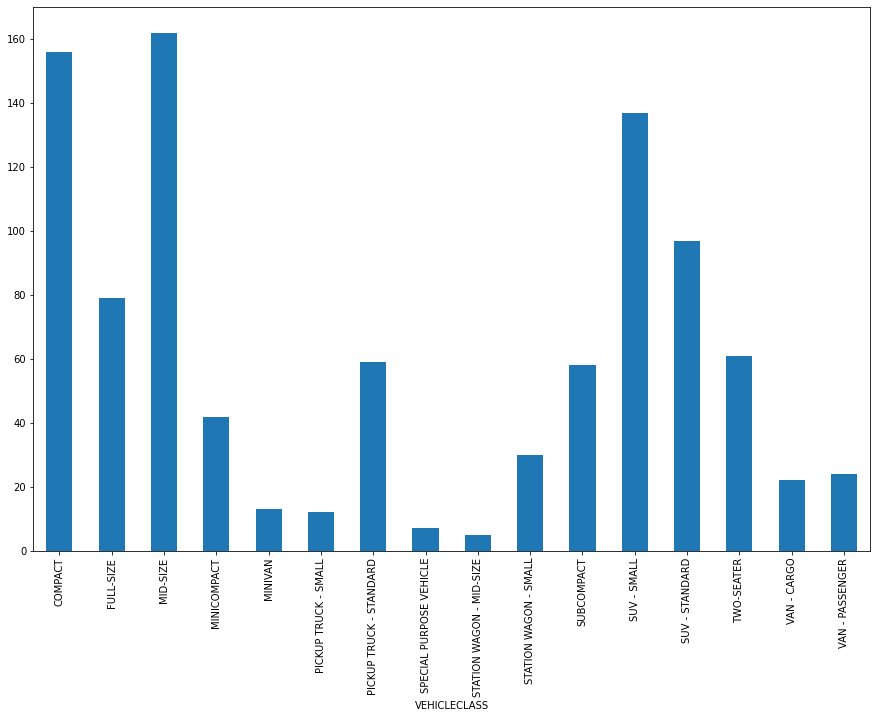

In [314]:
df.groupby('VEHICLECLASS').size().plot(kind='bar', figsize=(15,10))

<AxesSubplot:xlabel='TRANSMISSION'>

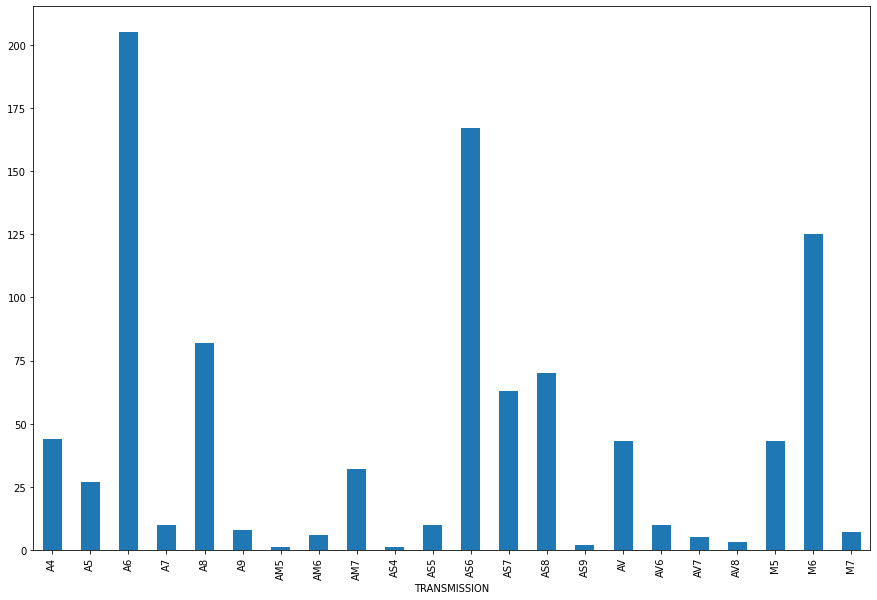

In [315]:
df.groupby('TRANSMISSION').size().plot(kind='bar', figsize=(15,10))

## Part 7 - Normalization

dropping the non numeric features

In [316]:
df.drop(['MAKE', 'MODEL', 'VEHICLECLASS', 'FUELTYPE', 'TRANSMISSION'], axis=1, inplace=True)
df

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,2.0,4.0,9.9,6.7,8.5,33,196.0
1,2014,2.4,4.0,11.2,7.7,9.6,29,221.0
2,2014,1.5,4.0,6.0,5.8,5.9,48,136.0
4,2014,3.5,6.0,12.1,8.7,10.6,27,244.0
5,2014,3.5,6.0,11.9,7.7,10.0,28,230.0
...,...,...,...,...,...,...,...,...
1062,2014,3.0,6.0,13.4,9.8,11.8,24,271.0
1063,2014,3.2,6.0,13.2,9.5,11.5,25,264.0
1064,2014,3.0,6.0,13.4,9.8,11.8,24,271.0
1065,2014,3.2,6.0,12.9,9.3,11.3,25,260.0


Normalize data by dividing all numeric data with corresponding standard deviation and save prior factors for later (denormalization proces)

In [317]:
prior_factors = {}
def init_factors(x):
    prior_factors[x.name] = (x.mean(), x.std())

df.iloc[:,1:].apply(init_factors, axis=0)
df.iloc[:,1:] = df.iloc[:,1:].apply(lambda x: (x-x.mean())/ x.std(), axis=0)
df

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,-0.973622,-1.006902,-0.833605,-0.994870,-0.888216,0.886286,-0.960111
1,2014,-0.683744,-1.006902,-0.519842,-0.641939,-0.576247,0.352882,-0.564949
2,2014,-1.335970,-1.006902,-1.774893,-1.312508,-1.625596,2.886552,-1.908498
4,2014,0.113422,0.113945,-0.302621,-0.289008,-0.292640,0.086180,-0.201401
5,2014,0.113422,0.113945,-0.350893,-0.641939,-0.462804,0.219531,-0.422691
...,...,...,...,...,...,...,...,...
1062,2014,-0.248926,0.113945,0.011141,0.099216,0.047690,-0.313873,0.225373
1063,2014,-0.103987,0.113945,-0.037130,-0.006663,-0.037393,-0.180522,0.114728
1064,2014,-0.248926,0.113945,0.011141,0.099216,0.047690,-0.313873,0.225373
1065,2014,-0.103987,0.113945,-0.109537,-0.077249,-0.094114,-0.180522,0.051502


## Part 8 - estimate CO2 emissions based on features

A) for every feature draw a scatter plot which shows the price of vehicles based on its feature

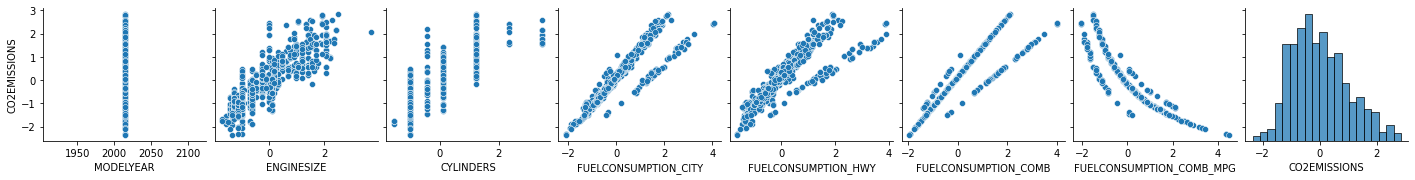

In [318]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(df, y_vars="CO2EMISSIONS", x_vars=df.columns.values)

B) Pick a feature that has the highest correlation

In [319]:
df.iloc[:, 1:].corr().style.background_gradient(cmap='coolwarm')

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
ENGINESIZE,1.000000,0.907432,0.815358,0.759536,0.801456,-0.798851,0.859528
CYLINDERS,0.907432,1.000000,0.777965,0.706604,0.758234,-0.756152,0.833871
FUELCONSUMPTION_CITY,0.815358,0.777965,1.000000,0.966171,0.995588,-0.934495,0.894860
FUELCONSUMPTION_HWY,0.759536,0.706604,0.966171,1.000000,0.986018,-0.892341,0.858261
FUELCONSUMPTION_COMB,0.801456,0.758234,0.995588,0.986018,1.000000,-0.926608,0.888687
FUELCONSUMPTION_COMB_MPG,-0.798851,-0.756152,-0.934495,-0.892341,-0.926608,1.000000,-0.905606
CO2EMISSIONS,0.859528,0.833871,0.894860,0.858261,0.888687,-0.905606,1.000000


based on chart above, we see that FUELCONSUMPTION_COMB has the second highest correlation among others <br>
on the other hand it has the most linear distribution. the FUEL CONSUMPTION COMB MPG has better correlation but the curve it has makes that unsutable as we are trying to do a simple order 1 linear regression.

## Part 9, 10, 11 - Training

Making new dataframe with FUELCONSUMPTION_COMB and CO2 EMISSIONS

In [320]:
df2 = df[['FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
X = df2.iloc[:, 0].values
Y = df2.iloc[:, 1].values
df2

,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,-0.888216,-0.960111
1,-0.576247,-0.564949
2,-1.625596,-1.908498
4,-0.292640,-0.201401
5,-0.462804,-0.422691
...,...,...
1062,0.047690,0.225373
1063,-0.037393,0.114728
1064,0.047690,0.225373
1065,-0.094114,0.051502


Plotting the target value based on desired feature

Text(0, 0.5, 'CO2 EMISSIONS')

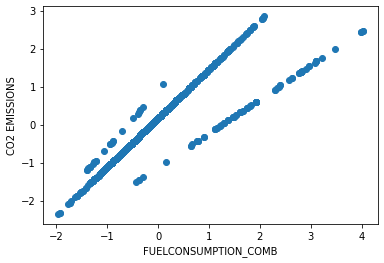

In [321]:
plt.scatter(X, Y)
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 EMISSIONS')

### Gradiant Decent
We use gradiant decent to determine the optimal theta 1 & 0 values <br>
function below is our Hypothesis function.

$$ \bar{y}(x) = \theta_1 \times X + \theta_0 $$

we introduce the Mean Square Error function below <br>
$$ MSE = \frac{1}{N} \sum_{i=1} (y_i - \bar{y}_\theta(x))^2 $$ 

we rewrite the MSE function with respect to hypothesis function
$$ MSE = \frac{1}{N} \sum_{i=1} (y_i - (\theta_1 X + \theta_0))^2 $$

we calculate the partial derivative of this function with respect to  $ \theta_1 $ and $ \theta_0 $
$$ D_{\theta_1} = \frac{-2}{n} \sum_{0}^{n}x_i(y_i - \bar{y}_i) $$
$$ D_{\theta_0} = \frac{-2}{n} \sum_{0}^{n}(y_i - \bar{y}_i) $$

finally we update the theta 1 & 0 values like so:
$$ \theta_1 = \theta_1 - \alpha \times D_{\theta_1} $$
$$ \theta_0 = \theta_0 - \alpha \times D_{\theta_0} $$

Note that alpha is our learning rate

We implement the procedure discussed above in the code below

In [322]:
theta1, theta0 = 0, 0

alpha = 0.0001
iteration_num = 10000  

n = float(len(X)) 

# Performing Gradient Descent 
for i in range(iteration_num): 
    Y_pred = theta1*X + theta0  
    D_theta1 = (-2/n) * sum(X * (Y - Y_pred))  
    D_theta0 = (-2/n) * sum(Y - Y_pred) 
    theta1 = theta1 - alpha * D_theta1  
    theta0 = theta0 - alpha * D_theta0  
    
print (theta1, theta0)

0.7681906535985425 2.232089455636895e-16


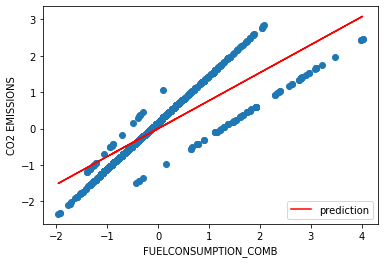

In [323]:
Y_pred = theta1*X + theta0

plt.scatter(X, Y) 
plt.plot(X, Y_pred, color='red', label='prediction')  
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2 EMISSIONS')
plt.legend(loc="lower right")
plt.show()

The red line represents our regression prediction which is close to our initial data. We calculate the MSE of that to ensure it's good enough.

Here we calculate Mean Square Error with given formula

$$ MSE = \frac{1}{N} \sum_{i=1} (y_i - \bar{y}_\theta(x))^2 $$

In [324]:
MSE = np.square(np.subtract(Y,Y_pred)).mean()
MSE 

0.22452147966569258

It's under 0.5 so it's good enough

## Part 12 - Prediction

Let's first check the dataframe with target NaN once again

In [325]:
df_with_target_nan

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6.0,AS6,3.0,12.7,9.1,11.1,25,NaN
20,2014,AUDI,A4 QUATTRO,COMPACT,2.0,4.0,AS8,3.0,11.5,8.1,10.0,28,NaN
30,2014,AUDI,A8,MID-SIZE,3.0,6.0,AS8,NaN,13.1,8.8,11.2,25,NaN
42,2014,AUDI,Q7,SUV - STANDARD,3.0,NaN,AS8,3.0,15.1,10.9,13.2,21,NaN
43,2014,AUDI,Q7 TDI CLEAN DIESEL,SUV - STANDARD,3.0,6.0,AS8,2.0,12.9,8.4,10.9,26,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,2014,VOLKSWAGEN,BEETLE CONVERTIBLE,SUBCOMPACT,2.0,4.0,M6,3.0,10.8,7.6,9.4,30,NaN
1027,2014,VOLKSWAGEN,CC,COMPACT,2.0,4.0,M6,3.0,11.6,7.7,9.8,29,NaN
1051,2014,VOLKSWAGEN,TIGUAN,SUV - SMALL,2.0,4.0,A6,3.0,11.7,9.5,10.7,26,NaN
1052,2014,VOLKSWAGEN,TIGUAN,SUV - SMALL,2.0,4.0,M6,3.0,13.6,9.2,11.6,24,NaN


Predict values with calculated thetas

In [331]:
pd.set_option('mode.chained_assignment', None)
fuel = df_with_target_nan.loc[:, 'FUELCONSUMPTION_COMB']
fuel = (fuel-fuel.mean())/fuel.std() # Normalize data

df_with_target_nan.loc[:, 'CO2EMISSIONS'] = theta1 * fuel + theta0
x = df_with_target_nan.loc[:, 'CO2EMISSIONS']

# Denormalize data using prior factors
x = prior_factors['CO2EMISSIONS'][1] * x + prior_factors['CO2EMISSIONS'][0] 

pd.DataFrame(x).to_csv('Predicted_Result.csv')
pd.DataFrame(x)

,CO2EMISSIONS
3,256.679943
20,239.186981
30,258.270213
42,290.075599
43,253.499405
...,...
1022,229.645365
1027,236.006442
1051,250.318866
1052,264.631290
